# Projeto de Machine Learning

O objetivo deste projeto é prever a nota da avaliação IMDb de um filme, estando disponíveis informações sobre plataforma de streaming, diretores, países, gêneros, entre outros. Os dados de análise foram retirados de: 
https://www.kaggle.com/ruchi798/movies-on-netflix-prime-video-hulu-and-disney

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
rating_db = pd.read_csv("MoviesOnStreamingPlatforms_updated.csv")
rating_db.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [3]:
rating_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16744 non-null  int64  
 1   ID               16744 non-null  int64  
 2   Title            16744 non-null  object 
 3   Year             16744 non-null  int64  
 4   Age              7354 non-null   object 
 5   IMDb             16173 non-null  float64
 6   Rotten Tomatoes  5158 non-null   object 
 7   Netflix          16744 non-null  int64  
 8   Hulu             16744 non-null  int64  
 9   Prime Video      16744 non-null  int64  
 10  Disney+          16744 non-null  int64  
 11  Type             16744 non-null  int64  
 12  Directors        16018 non-null  object 
 13  Genres           16469 non-null  object 
 14  Country          16309 non-null  object 
 15  Language         16145 non-null  object 
 16  Runtime          16152 non-null  float64
dtypes: float64(2

In [4]:
colunas = ["ID", "Title", "Rotten Tomatoes", "Type", "Unnamed: 0"]
rating_db = rating_db.drop(columns = colunas)

In [5]:
#Como o objetivo é prever o IMDb, linhas sem a informação não serão consideradas
rating_db = rating_db.dropna(subset=["IMDb"])
rating_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16173 entries, 0 to 16742
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         16173 non-null  int64  
 1   Age          7316 non-null   object 
 2   IMDb         16173 non-null  float64
 3   Netflix      16173 non-null  int64  
 4   Hulu         16173 non-null  int64  
 5   Prime Video  16173 non-null  int64  
 6   Disney+      16173 non-null  int64  
 7   Directors    15690 non-null  object 
 8   Genres       16072 non-null  object 
 9   Country      15955 non-null  object 
 10  Language     15801 non-null  object 
 11  Runtime      15819 non-null  float64
dtypes: float64(2), int64(5), object(5)
memory usage: 1.6+ MB


In [6]:
#Separador por vírgulas
def splitter(x):
    try:
        return x.split(",")
    except:
        return []

#Lista todas as variáveis com suas respectivas aparições, incluindo casos com dois valores.
#Ex: 'Ademar, Bernardo' --> 'Ademar': 1; 'Bernardo': 1

def sorted_bom(x):
    return sorted(list(Counter(rating_db[x].apply(splitter).apply(pd.Series).unstack().reset_index(drop=True).dropna().values).items()),key = lambda x: -x[1])

In [7]:
# Não mexer:
# sorted(list(Counter(rating_db["Directors"].apply(splitter).apply(pd.Series).unstack().reset_index(drop=True).dropna().values).items()),key = lambda x: x[1])

In [8]:
# Conversão das classes com apenas uma contribuição, para uma categoria "outros":
def generaliza_valores(x, nome_coluna):
    class_per_movie = rating_db[x].apply(splitter).apply(pd.Series)
    all_class_contributions = sorted_bom(x)

    # Classes a serem trocadas
    others = []

    # Identificação das classes com apenas uma contribuição
    
    for classes, contributions in all_class_contributions:
        if int(contributions) < 2:
            others.append(classes)

    # Listando somente classes com mais de 2 contribuições
    official_classes = class_per_movie.replace(others, "Outros "+nome_coluna)
    
    construtor = list(official_classes.columns)
    rating_db[x] = official_classes[construtor].apply(lambda x: ','.join(x[x.notnull()]), axis = 1)

In [9]:
%%time

official_languages = generaliza_valores("Language", "Idiomas")
print("Idiomas ok")
official_directors = generaliza_valores("Directors", "Diretores")
print("Diretores ok")
official_countries = generaliza_valores("Country", "Paises")
print("Paises ok")

Idiomas ok
Diretores ok
Paises ok
Wall time: 3min 24s


In [10]:
# https://stackoverflow.com/questions/57469676/python-one-hot-encoding-for-comma-separated-values

In [11]:
%%time

#Multiple One-Hot-Encoding
new_df = pd.concat([rating_db.drop('Language', 1), rating_db['Language'].str.get_dummies(sep=",")], 1)
print("Rodou 1 coluna")
new_df2 = pd.concat([new_df.drop('Directors', 1), new_df['Directors'].str.get_dummies(sep=",")], 1)
print("Rodou 2 colunas")
new_df3 = pd.concat([new_df2.drop('Genres', 1), new_df2['Genres'].str.get_dummies(sep=",")], 1)
print("Rodou 3 colunas")
new_df4 = pd.concat([new_df3.drop('Country', 1), new_df3['Country'].str.get_dummies(sep=",")], 1)
print("Rodou 4 colunas")
rating_db_OHE = pd.concat([new_df4.drop('Age', 1), new_df4['Age'].str.get_dummies(sep=",")], 1)
print("Rodou 5 colunas")

Rodou 1 coluna
Rodou 2 colunas
Rodou 3 colunas
Rodou 4 colunas
Rodou 5 colunas
Wall time: 59.6 s


In [12]:
# https://stackoverflow.com/questions/37646473/how-could-i-do-one-hot-encoding-with-multiple-values-in-one-cell
# pd.DataFrame({"diretor":pd.Series(['2','1','3']).astype('category',categories = [sorted_bom("Directors")])})

In [13]:
# directors = sorted(list(Counter(official_directors.unstack().reset_index(drop=True).dropna().values).items()),key = lambda x: -x[1])

In [14]:
from sklearn.impute import SimpleImputer

#Preencher os valores vazios de RunTime, a partir da mediana da coluna
imputer = SimpleImputer(strategy="median")

#Treina o imputer
imputer.fit(rating_db_OHE[["Runtime"]])

#Adiciona os valores faltantes 
rating_db_OHE["Runtime"] = imputer.transform(rating_db_OHE[["Runtime"]])

In [15]:
# from sklearn.impute import SimpleImputer

# # Antes de treinar o SimpleImputer, remover a coluna de dados categóricos. O dataset resultante tem apenas
# # as variáveis independentes numéricas.
# rating_db_imputer = rating_db_nans.copy()

# # Cria um imputer que substitui células inválidas (NaN) pela mediana dos valores da coluna à qual a célula pertence.
# imputer = SimpleImputer(strategy="median")

# # Agora treinar o Imputer. Isto vai causar o cálculo da mediana de cada coluna,
# # que ficará armazenado no Imputer para uso futuro.
# rating_db_imputer["Runtime"] = imputer.fit_transform(rating_db_imputer[["Runtime"]])

In [16]:
# # Trocar Nan de Age por Desconhecido
# rating_db_age = rating_db_nans.copy()
# rating_db_age = rating_db_age.replace(np.nan, value = "Desconhecido", regex = True)
# rating_db_nans["Age"] = rating_db_age["Age"]
# rating_db_age[["Age"]].info()

## Regressor

In [17]:
#Semente aleatória
RANDOM_SEED = 42
rating_db_tratado = rating_db_OHE.copy()

In [18]:
from sklearn.model_selection import train_test_split

# Separação dos conjuntos treinamento e teste
train_set, test_set = train_test_split(
    rating_db_tratado,
    test_size=0.2,
    random_state=RANDOM_SEED,
)

In [19]:
X_train = train_set.drop(columns=["IMDb"])
y_train = train_set["IMDb"]

In [20]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

#Testa a eficiência do modelo
def testa_modelo(model, X, y):
    scores = cross_val_score(
            model,
            X,
            y,
            scoring="neg_mean_squared_error",
            cv = 10,
            n_jobs=-1)
    
    rmse_scores = np.sqrt(-scores)
    
    print("Scores:", rmse_scores.round(decimals=2))
    print("Mean:", rmse_scores.mean())
    print("Standard deviation:", rmse_scores.std())

In [51]:
# # Para obter as previsões, basta chamar o método predict()
# predicted_labels = lin_reg.predict(X_train)
# print("Predição: {}".format(predicted_labels.round(decimals=2)))
# # Compare com os valores originais:
# print("Original: {}".format(y_train.values.round(decimals=2)))

In [52]:
# from sklearn.metrics import mean_squared_error

# predicted_labels = lin_reg.predict(X_train)
# lin_mse = mean_squared_error(y_train, predicted_labels)
# lin_rmse = np.sqrt(lin_mse)
# print("Regressão linear: RMSE = {:.2f}".format(lin_rmse))

In [53]:
%%time

#Regressor linear
lin_reg = LinearRegression()

testa_modelo(lin_reg, X_train, y_train)

Scores: [2.68710600e+09 1.78935541e+09 1.74734990e+10 2.05201184e+09
 9.23888753e+08 2.31219800e+08 1.85330705e+09 2.87649430e+09
 5.68302091e+08 5.23448465e+09]
Mean: 3568966892.972745
Standard deviation: 4826176561.819223
Wall time: 3min 57s


In [21]:
%%time

#Regressor Ridge
ridge_reg = Ridge(alpha=0.1)

testa_modelo(ridge_reg, X_train, y_train)

Scores: [1.14 1.17 1.11 1.17 1.14 1.12 1.18 1.16 1.16 1.1 ]
Mean: 1.144625775904935
Standard deviation: 0.026453966232313948
Wall time: 41.2 s


In [22]:
%%time

#Regressor linear
lasso_reg = Lasso(alpha=0.1)

testa_modelo(lasso_reg, X_train, y_train)

Scores: [1.26 1.27 1.21 1.3  1.26 1.27 1.26 1.28 1.24 1.21]
Mean: 1.2551632317735129
Standard deviation: 0.027267966552262476
Wall time: 13.7 s


In [23]:
%%time

#Regressor linear
elastic_reg = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state = RANDOM_SEED)

testa_modelo(elastic_reg, X_train, y_train)

Scores: [1.22 1.23 1.17 1.25 1.21 1.21 1.21 1.23 1.19 1.17]
Mean: 1.2081254494399114
Standard deviation: 0.02477249563609101
Wall time: 9.57 s


In [57]:
%%time

#Regressor linear
# forest_reg = RandomForestRegressor(random_state=RANDOM_SEED)

# testa_modelo(forest_reg, X_train, y_train)

Scores: [1.1  1.11 1.02 1.08 1.05 1.05 1.07 1.06 1.05 1.08]
Mean: 1.0658759029114138
Standard deviation: 0.025030593644727598
Wall time: 6min 37s


* Tirar as variáveis mais importantes: como fica o desempenho do regressor?
* Análise exploratória - visualização
* Criar uma lista de perguntas para responder - ex. qual diretor tem mais impacto positivo no rating? Qual a relação entre rating e ano de lançamento?
* Qualidade do código - melhorar nome das variáveis

In [24]:
%%time

from sklearn.model_selection import GridSearchCV

param_grid = [{

"n_estimators": [30,50,70,100,150,200], #dois valores possíveis de estimadores - estou usando random forest, então tem esse parâmetro
"max_features": [4, 6, 8],
    },
]

forest_reg = RandomForestRegressor(random_state=RANDOM_SEED)

# train across 5 folds, that's a total of (6+4)*5=50 rounds of training.
grid_search = GridSearchCV(
forest_reg, #Modelo
param_grid, #Grid
cv=5, #Partições de CV
scoring="neg_mean_squared_error",
return_train_score=True, #Se quero ver scores ou não
n_jobs=-1,
)
grid_search.fit(X_train, y_train)

Wall time: 25min 18s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'max_features': [4, 6, 8],
                          'n_estimators': [30, 50, 70, 100, 150, 200]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [25]:
model = grid_search.best_estimator_
model

RandomForestRegressor(max_features=6, n_estimators=200, random_state=42)

In [26]:
feature_importances = grid_search.best_estimator_.feature_importances_
attributes = X_train.columns
sorted(zip(feature_importances, attributes), reverse=True)

[(0.12556519664345073, 'Runtime'),
 (0.10421937269618864, 'Year'),
 (0.0587010448615483, 'Horror'),
 (0.05662750799481207, 'Documentary'),
 (0.02515090930454401, 'Thriller'),
 (0.023440184512727072, 'Drama'),
 (0.01989941067879826, 'Action'),
 (0.019563684403010363, 'Sci-Fi'),
 (0.01666339851677308, 'Prime Video'),
 (0.01663226153085583, 'Outros Diretores'),
 (0.01572705987292685, 'Comedy'),
 (0.015708348168253825, '18+'),
 (0.013276663418778067, 'Netflix'),
 (0.012941331245150836, 'United States'),
 (0.01138424633049872, 'English'),
 (0.010545450079324937, 'Adventure'),
 (0.009544722007922179, 'Biography'),
 (0.008884681016135055, 'Romance'),
 (0.008559693473274068, 'Music'),
 (0.00845992271578936, 'Crime'),
 (0.008058867204046825, 'Fantasy'),
 (0.007342445456338644, '7+'),
 (0.007299749854053462, 'United Kingdom'),
 (0.007207632359374851, 'History'),
 (0.00712017620406954, 'Mystery'),
 (0.007043792552879735, '13+'),
 (0.0066369459544692744, 'Family'),
 (0.005772441610052519, 'Canada'

In [27]:
# Separação dos conjuntos treinamento e teste
import shap
X_train_shap, X_test_shap, y_train_shap, y_test_shap = train_test_split(
    X_train,
    y_train,
    test_size=0.1,
    random_state=RANDOM_SEED,
)

In [29]:
X_train_summary = shap.kmeans(X_train_shap, 10)

shap.initjs()

In [30]:
ex = shap.KernelExplainer(model.predict, X_train_summary)
shap_values = ex.shap_values(X_test_shap.iloc[0,:])
shap.plots.force(ex.expected_value, shap_values, X_test_shap.iloc[0,:])

  0%|          | 0/1294 [00:00<?, ?it/s]

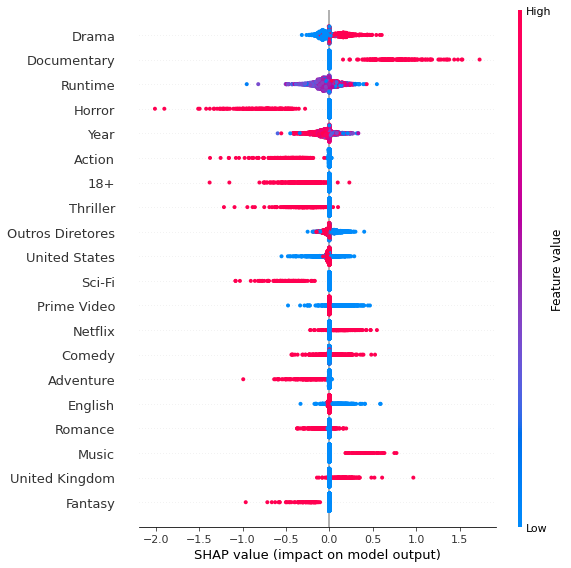

In [31]:
# shap_values = ex.shap_values(X_test_shap)
# shap.summary_plot(shap_values, X_test_shap)

In [ ]:
shap.summary_plot(shap_values, X_test_shap, max_values=50, sort=False)

In [ ]:
rf_explainer = shap.TreeExplainer(model)
rf_shap_values = rf_explainer.shap_values(X_test_shap.iloc[0:20,:])

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(rf_shap_values, X_test_shap.iloc[0:20,:])

In [ ]:
non_relevant_columns = []
for imp, atrb in sorted(zip(feature_importances, attributes), reverse=True):
    if imp>1e-3:
        non_relevant_columns.append(atrb)